In [1]:
%pylab inline
import numpy as np
from numpy import genfromtxt

cmap=plt.get_cmap('jet_r')

Populating the interactive namespace from numpy and matplotlib


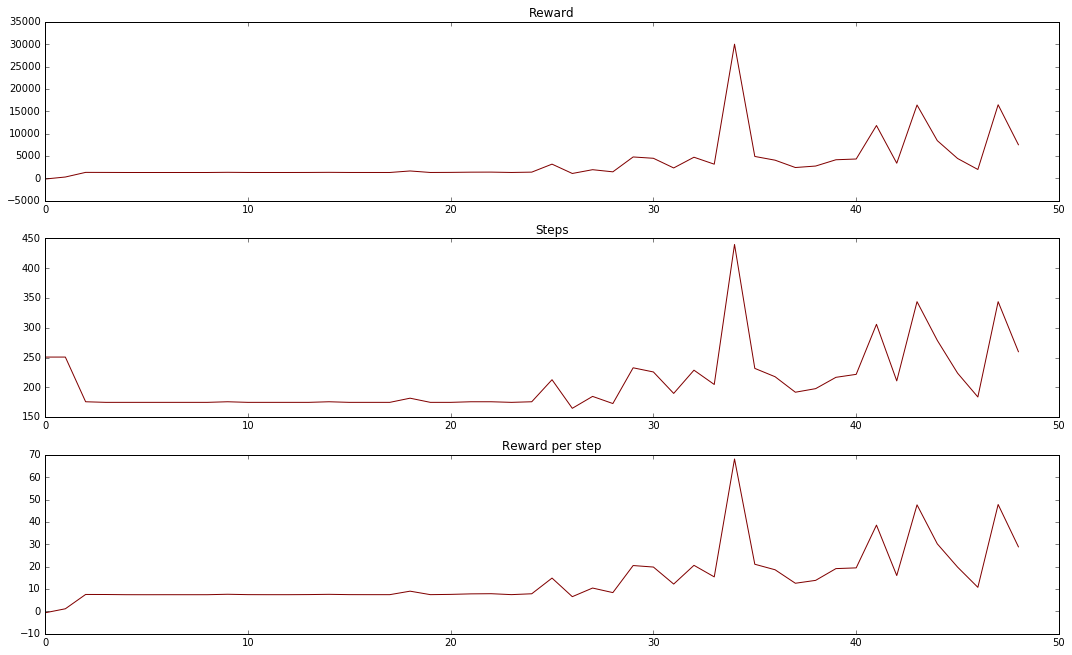

In [53]:
rewards = []
rewards_step = []
steps = []
track_names = []
i=-1
with open('../runs/aalborg_train/rewards.csv', 'r') as f:
    data = f.readlines()
    
for reading in data:
    try:
        rewards[i].append(float(reading.split(', ')[0].replace('\n', '')))
        steps[i].append(float(reading.split(', ')[1].replace('\n', '')))
        rewards_step[i].append(float(reading.split(', ')[2].replace('\n', '')))
    except:
        rewards.append([])
        steps.append([])
        rewards_step.append([])
        track_names.append(reading)
        i+=1
        
for i in range(len(rewards_step)):
    r = rewards[i]
    s = steps[i]
    r_s = rewards_step[i]

    if r:
        label = track_names[i]
        color = cmap(i/len(rewards))
        x = np.array(range(len(r)))
        polyfit_r = np.polyfit(x, r, 1)
        polyfit_s = np.polyfit(x, s, 1)
        polyfit_r_s = np.polyfit(x, r_s, 1)

        plt.figure(figsize=(15, 12))       
        plt.subplot(4, 1, 1)
        plt.title('Reward')
        #plt.plot(x, polyfit_r[0]*x + polyfit_r[1], label=label, linewidth=2, color=color)
        plt.plot(r, alpha=1, label=label, color=color)
        
        plt.subplot(4, 1, 2)
        plt.title('Steps')
        #plt.plot(x, polyfit_s[0]*x + polyfit_s[1], label=label, linewidth=2, color=color)
        plt.plot(s, alpha=1, label=label, color=color)
        
        plt.subplot(4, 1, 3)
        plt.title('Reward per step')
        #plt.plot(x, polyfit_r_s[0]*x + polyfit_r_s[1], label=label, linewidth=2, color=color)
        plt.plot(r_s, alpha=1, label=label, color=color)
        
        # plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=3, fancybox=True, shadow=True)
        plt.tight_layout()
        plt.show()